In [1]:
!ls

data_analysis_and _processing.ipynb


# Checkpoint Champion -- Predicting Winners at 25

**Name(s)**: Xingzhi Cui, Yun Jong Na

**Website Link**: https://mrtuge123.github.io/League_of_Legends_Analysis/

## Step One: Introduction

In [2]:
# Loading Packages
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegressionCV
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from matplotlib.colors import ListedColormap
from sklearn.feature_selection import RFECV
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LassoCV
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
pd.options.plotting.backend = 'plotly'

In [3]:
# Reading Data
dfs = []

file_path = f"/Users/tiger.c/Desktop/EECS398/wn25/League_of_Legends_Analysis/data/lol_2024.csv"
df = pd.read_csv(file_path, low_memory=False)
dfs.append(df)

data = pd.concat(dfs, ignore_index=True)


In [4]:
# Displaying Original Data Info
print("There are", df.shape[0], "rows and ", df.shape[1], "columns present in the data.")


There are 117600 rows and  161 columns present in the data.


In [5]:
# Number of Games Recorded
df['gameid'].nunique()

9800

In [6]:
#Filter out team data
data = data[data['position'] == 'team']

In [7]:
#Columns in Data
columns = [x for x in data.columns]
columns

['gameid',
 'datacompleteness',
 'url',
 'league',
 'year',
 'split',
 'playoffs',
 'date',
 'game',
 'patch',
 'participantid',
 'side',
 'position',
 'playername',
 'playerid',
 'teamname',
 'teamid',
 'champion',
 'ban1',
 'ban2',
 'ban3',
 'ban4',
 'ban5',
 'pick1',
 'pick2',
 'pick3',
 'pick4',
 'pick5',
 'gamelength',
 'result',
 'kills',
 'deaths',
 'assists',
 'teamkills',
 'teamdeaths',
 'doublekills',
 'triplekills',
 'quadrakills',
 'pentakills',
 'firstblood',
 'firstbloodkill',
 'firstbloodassist',
 'firstbloodvictim',
 'team kpm',
 'ckpm',
 'firstdragon',
 'dragons',
 'opp_dragons',
 'elementaldrakes',
 'opp_elementaldrakes',
 'infernals',
 'mountains',
 'clouds',
 'oceans',
 'chemtechs',
 'hextechs',
 'dragons (type unknown)',
 'elders',
 'opp_elders',
 'firstherald',
 'heralds',
 'opp_heralds',
 'void_grubs',
 'opp_void_grubs',
 'firstbaron',
 'barons',
 'opp_barons',
 'firsttower',
 'towers',
 'opp_towers',
 'firstmidtower',
 'firsttothreetowers',
 'turretplates',
 'op

In [8]:
print("There are", data.shape[0], "rows and ", data.shape[1], "columns present in the data.")

There are 19600 rows and  161 columns present in the data.


## Step 2: Data Cleaning and Analysis

In [9]:
# Columns we selected relevant to 25 minute checkpoint, uncleaned
columns_to_check = [
    'goldat25', 'xpat25', 'csat25', 'opp_goldat25', 'opp_xpat25', 'opp_csat25',
    'golddiffat25', 'xpdiffat25', 'csdiffat25',
    'killsat25', 'assistsat25', 'deathsat25',
    'opp_killsat25', 'opp_assistsat25', 'opp_deathsat25'
]

In [10]:
# This showed that if one of the values is missing in the 25 minute checkpoint,
# all the other values are missing as well
data[columns_to_check].isna().mean()

goldat25           0.20102
xpat25             0.20102
csat25             0.20102
opp_goldat25       0.20102
opp_xpat25         0.20102
opp_csat25         0.20102
golddiffat25       0.20102
xpdiffat25         0.20102
csdiffat25         0.20102
killsat25          0.20102
assistsat25        0.20102
deathsat25         0.20102
opp_killsat25      0.20102
opp_assistsat25    0.20102
opp_deathsat25     0.20102
dtype: float64

In [11]:
# Data Cleaning. Because we need all these variables, and datapoints that 
# don't have one of these variables are likely to have missed all of them,
# we therefore simply dropped all the rows with missing values.
columns_to_check = [
    'goldat25', 'xpat25', 'csat25', 'opp_goldat25', 'opp_xpat25', 'opp_csat25',
    'golddiffat25', 'xpdiffat25', 'csdiffat25',
    'killsat25', 'assistsat25', 'deathsat25',
    'opp_killsat25', 'opp_assistsat25', 'opp_deathsat25'
]

data = data.dropna(subset=columns_to_check)

In [12]:
# Number of rows the data now has
data.shape[0]

15660

# TODO: Univariate and Bivariate plots (kevin)

In [ ]:
univariate_plot = px.histogram(data, x='golddiffat25', nbins=50, title='Distribution of Gold Difference at 25 Minutes')
univariate_plot.show()

In [ ]:
bivariate_plot = px.box(data, x='result', y='golddiffat25', title='Gold Difference by Match Outcome')
bivariate_plot.show()

In [ ]:
summary = data.groupby('result')[[
    'goldat25', 'xpat25', 'csat25', 'killsat25', 'deathsat25'
]].mean().round(2).reset_index()

aggregate_table = go.Figure(data=[go.Table(
    header=dict(
        values=list(summary.columns),
        fill_color='lightblue',
        align='center',
        font=dict(color='black', size=14)
    ),
    cells=dict(
        values=[summary[col] for col in summary.columns],
        fill_color='lavender',
        align='center',
        font=dict(color='black', size=12)
    ))
])
aggregate_table.show()

## Step 3: Baseline Model Construction

In [13]:
# Columns for Baseline Model
columns_to_check = [
    'goldat25', 'xpat25', 'csat25', 'killsat25','deathsat25'
]


In [14]:
# Splitting into training and testing sets:
cols = ['gameid']+['result'] + columns_to_check
mod_data = data.copy()
data_part1 = mod_data[cols]
y = data_part1['result']
X = data_part1[columns_to_check]
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3,random_state=103) 


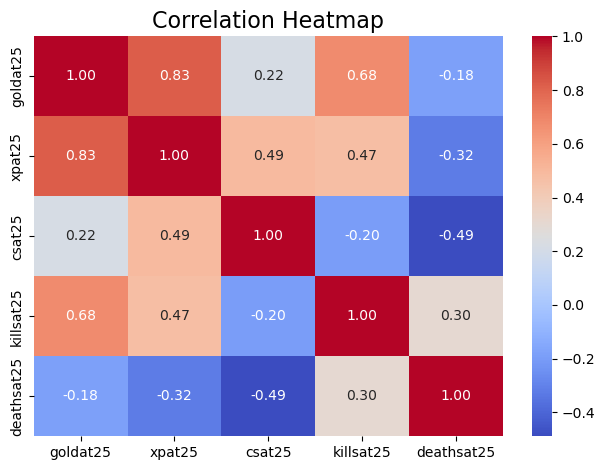

In [15]:
# Show that the data still has lingering multicorrelations
corr_matrix = X.corr()

# Visualize the correlation matrix
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title('Correlation Heatmap', fontsize=16)
plt.tight_layout()
plt.show()

In [16]:
#Baseline model, simple logistic regression
pipeline = make_pipeline(
    StandardScaler(),
    LogisticRegression(random_state=398, solver='liblinear') 
)

pipeline.fit(X_train, y_train)

y_pred = pipeline.predict(X_test)
testing_accuracy = accuracy_score(y_test, y_pred)

log_reg_cv = pipeline.named_steps['logisticregression']
num_non_zero = np.count_nonzero(log_reg_cv.coef_[0])
roc_auc = roc_auc_score(y_test, pipeline.decision_function(X_test))

y_train_pred = pipeline.predict(X_train)
training_accuracy = accuracy_score(y_train, y_train_pred)

new_row = {
    'Model Name': 'Baseline_Simple_Logistic_Regression',
    'num_non_zero': num_non_zero,
    'training_accuracy': training_accuracy,
    'testing_accuracy': testing_accuracy,
    'ROC_accuracy': roc_auc
}

row_df = pd.DataFrame([new_row])

# Initializes output DataFrame
Model_selection_df = pd.DataFrame([new_row], columns = ['Model Name','num_non_zero',
                                             'training_accuracy','testing_accuracy','ROC_accuracy'])

print(Model_selection_df.to_markdown(index=False))


| Model Name                          |   num_non_zero |   training_accuracy |   testing_accuracy |   ROC_accuracy |
|:------------------------------------|---------------:|--------------------:|-------------------:|---------------:|
| Baseline_Simple_Logistic_Regression |              5 |            0.809433 |           0.812473 |       0.897624 |


## Step Four: Attempting Better Models

In [17]:
# Filtering data and columns for future models
data['side_binary'] = data['side'].map({'Blue': 0, 'Red': 1})
cols = ['gameid','result','goldat25', 'xpat25', 'csat25', 'killsat25','deathsat25', 'opp_goldat25', 'opp_xpat25', 'opp_csat25', 'side_binary' ,'gamelength', 'league']
data = data[cols]
y = data['result']
X = data[['goldat25', 'xpat25', 'csat25', 'killsat25','deathsat25', 'opp_goldat25', 'opp_xpat25', 'opp_csat25', 'side_binary' ,'gamelength', 'league']]
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3,random_state=103) 

In [18]:
# Define a data preprocessor
numeric_feats = ['goldat25', 'xpat25', 'csat25', 'killsat25','deathsat25', 'opp_goldat25', 'opp_xpat25', 'opp_csat25', 'side_binary' ,'gamelength']
categorical_feats = ['league']

preprocessor = ColumnTransformer([
    ('num', StandardScaler(), numeric_feats),
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_feats)
], remainder='drop') 

In [19]:
# LASSO
pipeline = make_pipeline(
    preprocessor,
    LogisticRegressionCV(
        cv=5,
        penalty='l1',
        solver='liblinear',
        random_state=398
    )
)

pipeline.fit(X_train, y_train)

ct = pipeline.named_steps['columntransformer']
feature_names = ct.get_feature_names_out()

y_test_pred = pipeline.predict(X_test)
y_test_score = pipeline.decision_function(X_test)
testing_accuracy = accuracy_score(y_test, y_test_pred)
roc_auc          = roc_auc_score(y_test, y_test_score)

log_reg_cv = pipeline.named_steps['logisticregressioncv']

coef_series = pd.Series(
    log_reg_cv.coef_[0],
    index=feature_names
)

selected_features = coef_series[coef_series != 0].index.tolist()
num_non_zero = len(selected_features)

y_train_pred = pipeline.predict(X_train)
training_accuracy = accuracy_score(y_train, y_train_pred)

new_row = {
    'Model Name':        'LogisticRegressionCV_L1',
    'num_non_zero':      num_non_zero,
    'training_accuracy': training_accuracy,
    'testing_accuracy':  testing_accuracy,
    'ROC_accuracy':      roc_auc
}

Model_selection_df.loc[len(Model_selection_df)] = new_row

In [20]:
#Ridge_Logistic_Regression
pipeline_ridge = make_pipeline(
    preprocessor,  
    LogisticRegressionCV(
        cv=5,
        penalty='l2',
        solver='liblinear',
        random_state=398
    )
)

pipeline_ridge.fit(X_train, y_train)

y_pred_ridge        = pipeline_ridge.predict(X_test)
testing_accuracy_ridge  = accuracy_score(y_test, y_pred_ridge)
y_train_pred_ridge      = pipeline_ridge.predict(X_train)
training_accuracy_ridge = accuracy_score(y_train, y_train_pred_ridge)
roc_auc_ridge           = roc_auc_score(
    y_test,
    pipeline_ridge.decision_function(X_test)
)

ridge_model      = pipeline_ridge.named_steps['logisticregressioncv']
feature_names    = pipeline_ridge.named_steps['columntransformer'] \
                                 .get_feature_names_out()
coef_series_ridge = pd.Series(
    ridge_model.coef_[0],
    index=feature_names
)
num_non_zero_ridge = (coef_series_ridge != 0).sum()


Model_selection_df.loc[len(Model_selection_df)] = {
    'Model Name':        'Ridge_LogisticRegressionCV',
    'num_non_zero':      num_non_zero_ridge,
    'training_accuracy': training_accuracy_ridge,
    'testing_accuracy':  testing_accuracy_ridge,
    'ROC_accuracy':      roc_auc_ridge
}

print(Model_selection_df.to_markdown(index=False))

| Model Name                          |   num_non_zero |   training_accuracy |   testing_accuracy |   ROC_accuracy |
|:------------------------------------|---------------:|--------------------:|-------------------:|---------------:|
| Baseline_Simple_Logistic_Regression |              5 |            0.809433 |           0.812473 |       0.897624 |
| LogisticRegressionCV_L1             |              9 |            0.835888 |           0.8361   |       0.921376 |
| Ridge_LogisticRegressionCV          |             57 |            0.835979 |           0.836526 |       0.921788 |


In [21]:
# Backwards elimination to find the best function
base_model = LogisticRegression(solver='liblinear', penalty='l1', random_state=398)

pipeline_rfecv = make_pipeline(
    preprocessor,  # ColumnTransformer defined earlier
    RFECV(
        estimator=base_model,
        cv=5,
        scoring='roc_auc',
        step=1
    )
)

pipeline_rfecv.fit(X_train, y_train)

y_pred_rfecv         = pipeline_rfecv.predict(X_test)
testing_accuracy_rfecv  = accuracy_score(y_test, y_pred_rfecv)
roc_auc_rfecv           = roc_auc_score(y_test, pipeline_rfecv.decision_function(X_test))

y_train_pred_rfecv      = pipeline_rfecv.predict(X_train)
training_accuracy_rfecv = accuracy_score(y_train, y_train_pred_rfecv)

feature_names   = pipeline_rfecv.named_steps['columntransformer'].get_feature_names_out()
rfecv_step      = pipeline_rfecv.named_steps['rfecv']
support_mask    = rfecv_step.support_
selected_features = feature_names[support_mask].tolist()

coef_selected = pd.Series(rfecv_step.estimator_.coef_[0], index=selected_features)
num_non_zero_rfecv = np.count_nonzero(coef_selected)

Model_selection_df.loc[len(Model_selection_df)] = {
    'Model Name':        'LogisticRegression_RFECV_BackwardElimination',
    'num_non_zero':      num_non_zero_rfecv,
    'training_accuracy': training_accuracy_rfecv,
    'testing_accuracy':  testing_accuracy_rfecv,
    'ROC_accuracy':      roc_auc_rfecv
}

print(Model_selection_df.to_markdown(index=False))

| Model Name                                   |   num_non_zero |   training_accuracy |   testing_accuracy |   ROC_accuracy |
|:---------------------------------------------|---------------:|--------------------:|-------------------:|---------------:|
| Baseline_Simple_Logistic_Regression          |              5 |            0.809433 |           0.812473 |       0.897624 |
| LogisticRegressionCV_L1                      |              9 |            0.835888 |           0.8361   |       0.921376 |
| Ridge_LogisticRegressionCV                   |             57 |            0.835979 |           0.836526 |       0.921788 |
| LogisticRegression_RFECV_BackwardElimination |              5 |            0.835523 |           0.833972 |       0.920703 |


## Conclusion: Based on the above table, we chose the LASSO regression (L1 regularization)